In [1]:
import pandas as pd 
import numpy as np 


In [2]:
data = pd.read_csv('./kyphosis.csv')
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
feature = data.drop(columns=['Kyphosis'])
target = data['Kyphosis']

In [5]:
target.value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [6]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    feature,
    target, 
    random_state=42,
    stratify=target
)

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()


In [9]:
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
predictions = tree_model.predict(X_test)
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'present', 'absent'], dtype=object)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.83      0.88      0.86        17
     present       0.33      0.25      0.29         4

    accuracy                           0.76        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.74      0.76      0.75        21



In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


In [13]:
scores = cross_val_score(
    tree_model,
    feature,
    target,
    cv=cv,
    # scoring='f1_macro'
)
scores

array([0.71428571, 0.8       , 0.85      , 0.6       ])

In [14]:
np.mean(scores)

np.float64(0.7410714285714286)

[Text(0.578125, 0.9166666666666666, 'Start <= 12.5\ngini = 0.339\nsamples = 60\nvalue = [47, 13]\nclass = absent'),
 Text(0.34375, 0.75, 'Number <= 4.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]\nclass = absent'),
 Text(0.4609375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'Age <= 88.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = absent'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = absent'),
 Text(0.1875, 0.4166666666666667, 'Number <= 3.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = absent'),
 Text(0.125, 0.25, 'Number <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = present'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = absent'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = present'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = absent'),
 Text(0.5625, 0.5833333333333334, 'Age <= 51.5\ngini = 0.

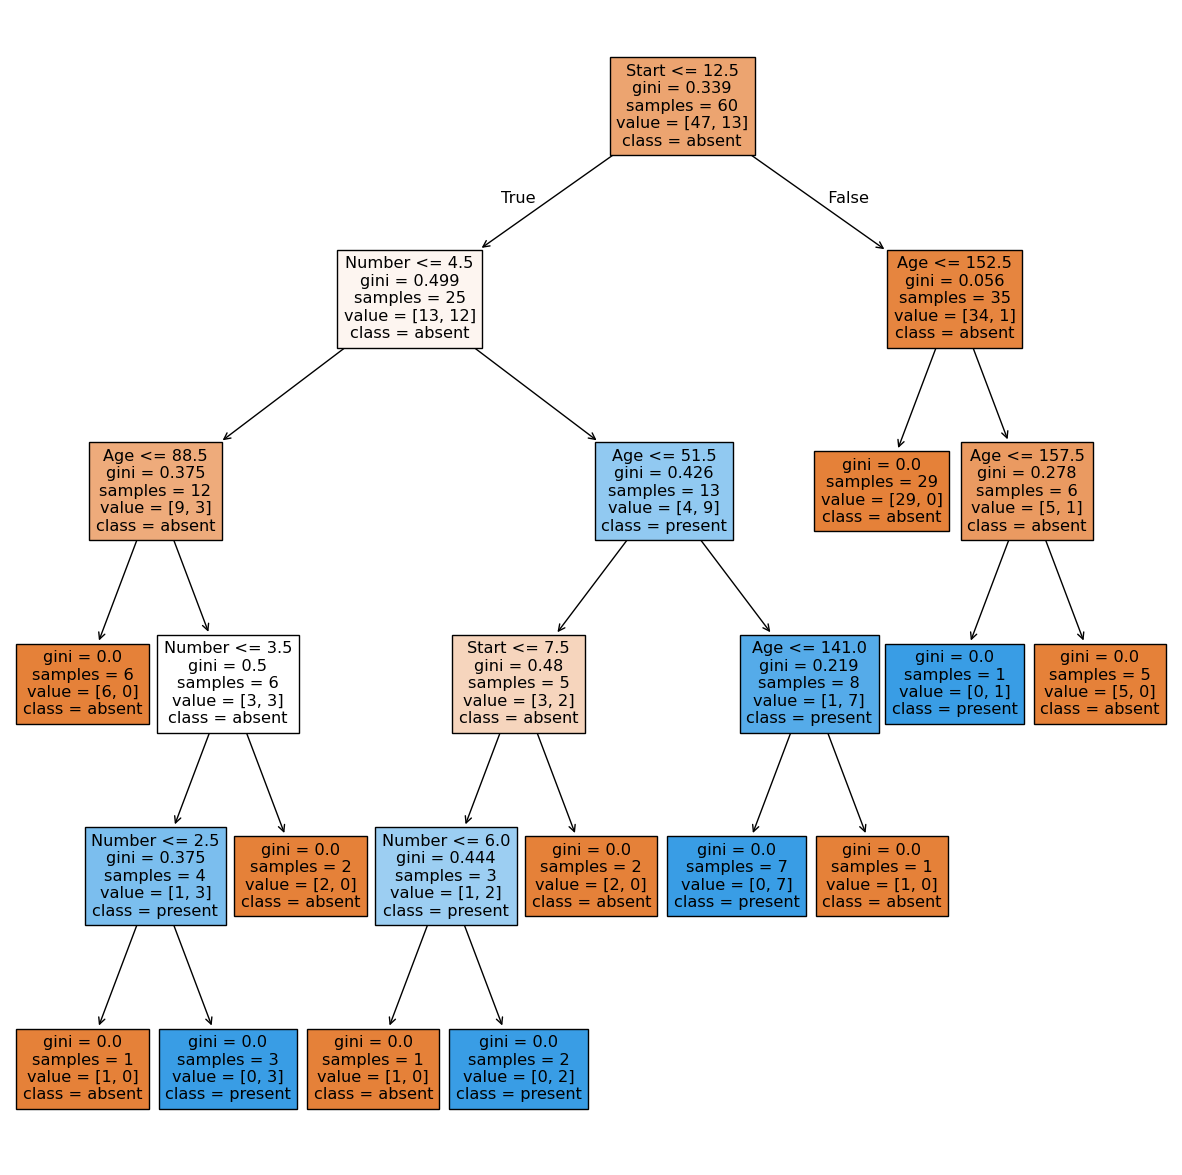

In [15]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt 
plt.figure(figsize=(15, 15))
plot_tree(tree_model, filled=True, feature_names=list(feature.columns), class_names=['absent', 'present'])